In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import sys
sys.path.append("..")
import pandas as pd

from src.eval_utils import explain_observation
from run_inference import load_text_processing_pipeline, load_keras_model

In [2]:
preprocess_pipeline = load_text_processing_pipeline('/home/cluster1/Documents/hate_speech_classifier/saved_model/hate_classifier_v2')
model = load_keras_model('/home/cluster1/Documents/hate_speech_classifier/saved_model/hate_classifier_v2')

In [3]:
while True:
    raw_user_input = input('Type in a sentence (or \q to quit): ')
    if raw_user_input == '\q':
        break

    user_input = raw_user_input
    # preprocess test vector
    X_test, _ = preprocess_pipeline.transform(pd.Series(user_input))

    # run inference
    predicted_prob, predicted = model.predict(X_test)

    # print prediction
    print(f'\nclass = "{predicted[0]}" ({predicted_prob.max()})')

Type in a sentence (or \q to quit):  He's a retarded feral negro ( yes , feral humans who cannot talk occasionally pop up , having been abandoned as children. ) .



class = "offensive_language" (0.6100262403488159)


Type in a sentence (or \q to quit):  \q


True: offensive_language --> Pred: offensive_language | Prob: 0.61


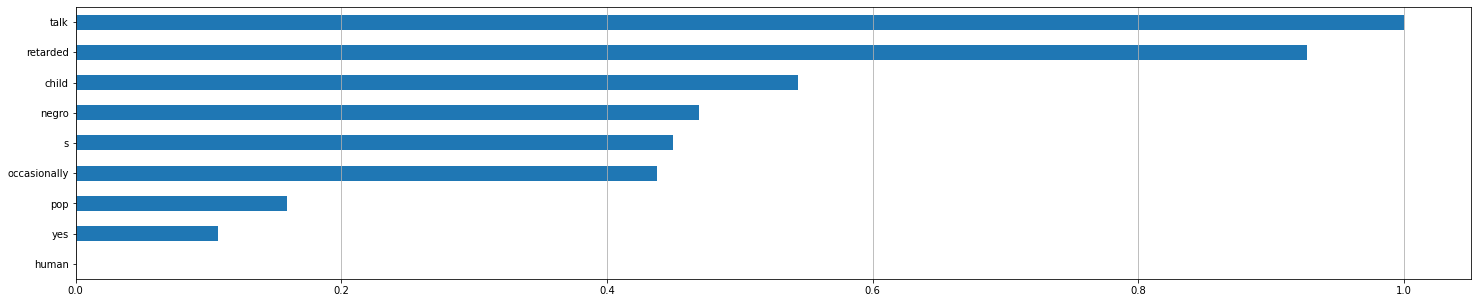

In [4]:
cleaned_text = preprocess_pipeline['normalize'].transform(pd.Series(user_input))
observation_dict = {
    'text': cleaned_text.iloc[0],
    'label': predicted[0],
    'predicted': predicted[0],
    'prediction_prob': predicted_prob.max()
}

nlp_dict = {
    'bigrams_detector': preprocess_pipeline['features'].ngrams_detector_list[0],
    'trigrams_detector': preprocess_pipeline['features'].ngrams_detector_list[1],
    'tokenizer': preprocess_pipeline['features'].fitted_tokenizer,
    'model': model.model
}

html_text = explain_observation(observation_dict, nlp_dict, top=10)